In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/imelvis/Dropbox/UST/Spring2018/ISOM5610/Pre/PoiRegression/insurance.csv')
ins=df

# Summary statistics of the numerical variables

In [15]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Exposure,67856,NaN,NaN,NaN,0.468652,0.290025,0.00273785,0.219028,0.44627,0.709103,0.999316
VehValue,67856,NaN,NaN,NaN,1.77702,1.20523,0,1.01,1.5,2.15,34.56
VehAge,67856,4,old cars,20064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehBody,67856,13,Sedan,22233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,67856,2,Female,38603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DrivAge,67856,6,older work. people,16189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNb,67856,NaN,NaN,NaN,0.072757,0.278204,0,0,0,0,4


# Bar Chart of each categorical variable:

Text(0.5,1,'Bar Chart of Gender')

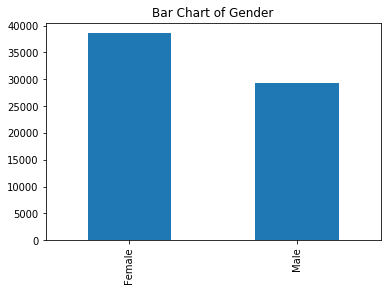

In [29]:
import matplotlib.pyplot as plt
ins['Gender'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Gender")

Text(0.5,1,'Bar Chart of VehBody')

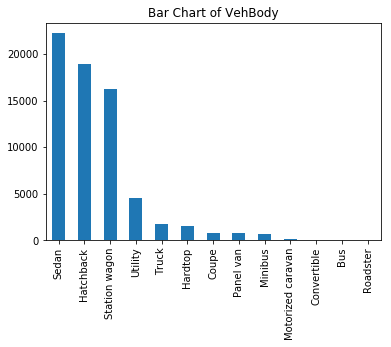

In [30]:
ins['VehBody'].value_counts().plot(kind='bar')
plt.title("Bar Chart of VehBody")

Text(0.5,1,'Bar Chart of VehAge')

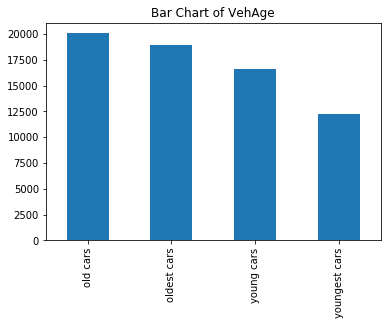

In [31]:
ins['VehAge'].value_counts().plot(kind='bar')
plt.title("Bar Chart of VehAge")

Text(0.5,1,'Bar Chart of DrivAge')

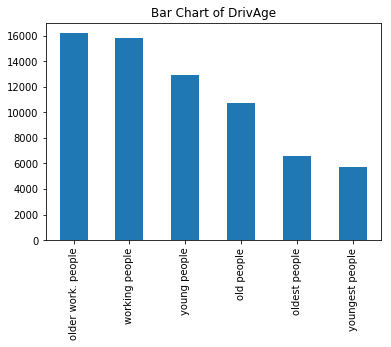

In [32]:
ins['DrivAge'].value_counts().plot(kind='bar')
plt.title("Bar Chart of DrivAge")

# Our Goal
* We aim to develop a regression model for ClaimNb with some useful predictors
    * Such that it helps to capture those factors affect the insurance claim and their relationship between the claim
        * i.e. to differentiate between the policyholders according to their risk of claims
    * As a consequence, the managers is able to set the premium correctly and fairly for everyone
        * Especially those policyholders with higher risk

# Poisson Regression
* Poisson regression is suggested if the response variable is a count data
* **glm()** from **statsmodels.formula.api** is used to fit a generalized linear model and poisson regression is one of those
    * by seting **family=sm.families.Poisson()**

* The full model

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#initial fit of Poisson regression
all_columns = "+".join(ins.columns[0:6])
my_formula="ClaimNb~"+all_columns
first_fit = smf.glm(formula = my_formula, data=ins, family=sm.families.Poisson()).fit()
first_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:                67856
Model:                            GLM   Df Residuals:                    67832
Model Family:                 Poisson   Df Model:                           23
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -17371.
Date:                Sat, 03 Feb 2018   Deviance:                       25308.
Time:                        15:14:04   Pearson chi2:                 6.89e+04
No. Iterations:                     6                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.9137      0.323     -9.034      0.000      -3.546      -2.282
VehAge[T.oldest cars]            -0.0578      0.041     -1.409      0.159      -0.138       0.023
VehAge[T.young cars]              0.1091      0.040      2.752      0.006       0.031       0.187
VehAge[T.youngest cars]           0.0371      0.048      0.769      0.442      -0.057       0.132
VehBody[T.Convertible]           -1.7470      0.668     -2.616      0.009      -3.056      -0.438
VehBody[T.Coupe]                 -0.5570      0.337     -1.653      0.098      -1.217       0.104
VehBody[T.Hardtop]               -0.8556      0.328     -2.610      0.009      -1.498      -0.213
VehBody[T.Hatchback]             -0.9953      0.318     -3.128      0.002      -1.619      -0.372
VehBody[T.Minibus]               -1.0258      0.350     -2.930      0.003      -1.712      -0.340
VehBody[T.Motorized caravan]     -0.4220      0.409     -1.031      0.303      -1.224       0.380
VehBody[T.Panel van]             -0.8911      0.339     -2.630      0.009      -1.555      -0.227
VehBody[T.Roadster]              -0.6071      0.660     -0.920      0.358      -1.900       0.686
VehBody[T.Sedan]                 -0.9454      0.318     -2.976      0.003      -1.568      -0.323
VehBody[T.Station wagon]         -0.9379      0.318     -2.949      0.003      -1.561      -0.315
VehBody[T.Truck]                 -1.0031      0.328     -3.055      0.002      -1.647      -0.360
VehBody[T.Utility]               -1.1507      0.322     -3.573      0.000      -1.782      -0.519
Gender[T.Male]                   -0.0201      0.030     -0.668      0.504      -0.079       0.039
DrivAge[T.older work. people]     0.2190      0.049      4.477      0.000       0.123       0.315
DrivAge[T.oldest people]          0.0093      0.064      0.145      0.885      -0.117       0.135
DrivAge[T.working people]         0.2458      0.049      5.012      0.000       0.150       0.342
DrivAge[T.young people]           0.2990      0.051      5.898      0.000       0.200       0.398
DrivAge[T.youngest people]        0.4717      0.059      7.987      0.000       0.356       0.587
Exposure                          1.8000      0.051     35.289      0.000       1.700       1.900
VehValue                          0.0275      0.017      1.609      0.108      -0.006       0.061
=================================================================================================
"""

# Overdispersion 
* There is a property about poisson distribution: Mean = variance
* It is common that variance > mean for the count data and it is called overdispersion
    * Such that it may not be a good choice to model the count data by poisson regression
* A common solution is to use negative binomial distribution which relax the constraint on the mean and variance


# Checking Overdispersion
* The mean and variance of the ClaimNb is 0.073 and 0.077 respectively
    * It seems that they are close to each other and overdipersion is not diagnosed 
* However, the number of claims for different policyholders is subjected to different time periods
    * So, it is suggested to model 𝑟=𝐶𝑙𝑎𝑖𝑚𝑁𝑏/𝐸𝑥𝑝𝑜𝑠𝑢𝑟𝑒
    * It is equivalent to add an offset term (i.e. log(Exposure) to the poisson regression
* The mean and variance of r:
    * Mean: 0.214 , variance: 8.30
    * Obviously, overdispersion is detected now
* **offset** is an optional setting for **glm()** and we will offset the log(Exposure) for the coming up analysis


In [8]:
#Checking Overdispersion
print ("Mean of ClaimNb: %.3f" % np.mean(ins['ClaimNb']), "Var of ClaimNb: %.3f" % np.var(ins['ClaimNb'])) 
print ("Mean of r: %.3f" %np.mean(ins['ClaimNb']/ins['Exposure']),"Var of r: %.3f" %  np.var(ins['ClaimNb']/ins['Exposure']))

Mean of ClaimNb: 0.073 Var of ClaimNb: 0.077
Mean of r: 0.214 Var of r: 8.296


# The new poisson regression model:


In [6]:
#poisson regression with offset
all_columns = "+".join(ins.columns[0:6])
my_formula="ClaimNb~"+all_columns
my_formula=my_formula+"-Exposure"
poi_fit = smf.glm(formula = my_formula, offset=np.log(ins['Exposure']), data=ins, family=sm.families.Poisson()).fit()
poi_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:                67856
Model:                            GLM   Df Residuals:                    67833
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -17389.
Date:                Fri, 02 Feb 2018   Deviance:                       25343.
Time:                        15:48:24   Pearson chi2:                 9.55e+04
No. Iterations:                     6                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.1983      0.321     -3.736      0.000      -1.827      -0.570
VehAge[T.oldest cars]            -0.0593      0.041     -1.444      0.149      -0.140       0.021
VehAge[T.young cars]              0.1114      0.040      2.810      0.005       0.034       0.189
VehAge[T.youngest cars]           0.0555      0.048      1.152      0.249      -0.039       0.150
VehBody[T.Convertible]           -1.6703      0.668     -2.501      0.012      -2.979      -0.361
VehBody[T.Coupe]                 -0.5109      0.337     -1.516      0.129      -1.171       0.149
VehBody[T.Hardtop]               -0.8335      0.328     -2.542      0.011      -1.476      -0.191
VehBody[T.Hatchback]             -0.9754      0.318     -3.065      0.002      -1.599      -0.352
VehBody[T.Minibus]               -0.9843      0.350     -2.812      0.005      -1.670      -0.298
VehBody[T.Motorized caravan]     -0.3880      0.409     -0.948      0.343      -1.190       0.414
VehBody[T.Panel van]             -0.8529      0.339     -2.517      0.012      -1.517      -0.189
VehBody[T.Roadster]              -0.5649      0.660     -0.856      0.392      -1.858       0.728
VehBody[T.Sedan]                 -0.9240      0.318     -2.909      0.004      -1.547      -0.301
VehBody[T.Station wagon]         -0.9119      0.318     -2.867      0.004      -1.535      -0.289
VehBody[T.Truck]                 -0.9632      0.328     -2.933      0.003      -1.607      -0.320
VehBody[T.Utility]               -1.1201      0.322     -3.478      0.001      -1.751      -0.489
Gender[T.Male]                   -0.0229      0.030     -0.761      0.447      -0.082       0.036
DrivAge[T.older work. people]     0.2191      0.049      4.479      0.000       0.123       0.315
DrivAge[T.oldest people]          0.0158      0.064      0.246      0.806      -0.110       0.142
DrivAge[T.working people]         0.2475      0.049      5.048      0.000       0.151       0.344
DrivAge[T.young people]           0.3075      0.051      6.067      0.000       0.208       0.407
DrivAge[T.youngest people]        0.4777      0.059      8.091      0.000       0.362       0.593
VehValue                          0.0239      0.017      1.390      0.165      -0.010       0.058
=================================================================================================
"""

# Negative Binomial Regression
* **negativebinomial()** from **statsmodels.formula.api** fits a negative binomial regression


In [11]:
#negative biominal regression with offset

all_columns = "+".join(ins.columns[0:6])
my_formula="ClaimNb~"+all_columns
my_formula=my_formula+"-Exposure"
#nb_fit = smf.glm(formula = my_formula, offset=np.log(ins['Exposure']), data=ins, family=sm.families.NegativeBinomial(alpha=0.4432)).fit()
nb_fit = smf.negativebinomial(formula=my_formula, data=ins, offset=np.log(ins['Exposure'])).fit()
nb_fit.summary()

         Current function value: 0.255971
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:                67856
Model:               NegativeBinomial   Df Residuals:                    67833
Method:                           MLE   Df Model:                           22
Date:                Fri, 19 Jan 2018   Pseudo R-squ.:                0.004506
Time:                        11:33:13   Log-Likelihood:                -17369.
converged:                      False   LL-Null:                       -17448.
                                        LLR p-value:                 2.036e-22
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.2050      0.338     -3.562      0.000      -1.868      -0.542
VehAge[T.oldest cars]            -0.0575      0.042     -1.370      0.171      -0.140       0.025
VehAge[T.young cars]              0.1074      0.041      2.643      0.008       0.028       0.187
VehAge[T.youngest cars]           0.0485      0.049      0.983      0.325      -0.048       0.145
VehBody[T.Convertible]           -1.6703      0.681     -2.452      0.014      -3.005      -0.335
VehBody[T.Coupe]                 -0.5075      0.355     -1.431      0.152      -1.203       0.188
VehBody[T.Hardtop]               -0.8358      0.345     -2.420      0.016      -1.513      -0.159
VehBody[T.Hatchback]             -0.9667      0.336     -2.880      0.004      -1.625      -0.309
VehBody[T.Minibus]               -0.9882      0.367     -2.691      0.007      -1.708      -0.268
VehBody[T.Motorized caravan]     -0.3873      0.429     -0.903      0.367      -1.228       0.454
VehBody[T.Panel van]             -0.8581      0.356     -2.407      0.016      -1.557      -0.159
VehBody[T.Roadster]              -0.5660      0.682     -0.829      0.407      -1.904       0.772
VehBody[T.Sedan]                 -0.9197      0.335     -2.744      0.006      -1.577      -0.263
VehBody[T.Station wagon]         -0.9120      0.336     -2.718      0.007      -1.570      -0.254
VehBody[T.Truck]                 -0.9700      0.346     -2.805      0.005      -1.648      -0.292
VehBody[T.Utility]               -1.1231      0.340     -3.308      0.001      -1.789      -0.458
Gender[T.Male]                   -0.0202      0.031     -0.656      0.512      -0.080       0.040
DrivAge[T.older work. people]     0.2200      0.050      4.410      0.000       0.122       0.318
DrivAge[T.oldest people]          0.0118      0.066      0.180      0.857      -0.117       0.140
DrivAge[T.working people]         0.2487      0.050      4.972      0.000       0.151       0.347
DrivAge[T.young people]           0.3099      0.052      5.993      0.000       0.209       0.411
DrivAge[T.youngest people]        0.4822      0.060      7.976      0.000       0.364       0.601
VehValue                          0.0265      0.018      1.497      0.134      -0.008       0.061
alpha                             0.4432      0.082      5.422      0.000       0.283       0.603
=================================================================================================
"""

# Poi. Reg. Vs NegBin. Reg.
* Hypothesis Testing (I) for:
    * H_0: Poisson Regression VS H_1: Negative Binomial Regression
    * It can be conducted by OD test and the test statistics is 
        * LR=2(logLikehood of negative binomial regression - logLikehood of poisson regression)
        * it follows a Chi-Square distribution with df=1
* Hypothesis Testing (II) for:
    * H_0: dispresion = 0 VS H_1: dispersion > 0
    * It can be done by Cameron and Trivedi test
    * It is based on a simple linear regression (without fitting the intercept): fit z on the fitted values
* Hypothesis Testing (III) for:
    * H_0: no dispersion VS H_1: overdispersion
    * It can be done by LM test
    * The test statistics follows a Chi-square distribution with df=1

In [13]:
#odTest
import scipy.stats as stats
a=0.05
LR=2*(nb_fit.llf-poi_fit.llf)
p_LR=(1 - stats.chi2.cdf(LR,1))/2
print ("odTest-p-value: %.5f" % p_LR)
print ("\n")

##Cameron and Trivedi test
z=((ins['ClaimNb']-poi_fit.fittedvalues)**2-ins['ClaimNb'])/(poi_fit.fittedvalues)
temp=pd.DataFrame({"y":z, "x":poi_fit.fittedvalues})
model = smf.ols('y~x-1',data=temp).fit()
print (model.summary())
print("%%%%%%%%%%%%%%%%%%%%%%\n")

#LM test
LM=sum((ins['ClaimNb']-poi_fit.fittedvalues)**2-poi_fit.fittedvalues)**2/(2*sum((poi_fit.fittedvalues)**2))
p_LM=1-stats.chi2.cdf(LM,1)
print ("LM-p-value: %.5f" % p_LM)

odTest-p-value: 0.00000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.76
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           1.09e-06
Time:                        11:34:05   Log-Likelihood:            -1.3944e+05
No. Observations:               67856   AIC:                         2.789e+05
Df Residuals:                   67855   BIC:                         2.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.4069     

# Stepwise for NegBin. Reg.
* Again, there is no package for doing stepwise selection in Python
* We use the funtion below to do a forward selection

In [38]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import functools
import re



def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)


def forward_selected(data,null_formula,full_formula,response,intercept):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """
    print('null model:'+ null_formula)
    print('full model:'+full_formula)
    
    null_temp        = re.split('~',null_formula)
    null_predic_com  = null_temp[1].split('+')
    null_predic      = null_predic_com[1:len(null_predic_com)]
    full_temp        = re.split('~',full_formula)
    full_predic_com  = full_temp[1].split('+')
    full_predic      = full_predic_com[1:len(full_predic_com)]
    indices          = [i for i,id in enumerate(full_predic) if id not in null_predic]
    domain           = [full_predic[i] for i in indices]

    start            = set(null_predic)
    remaining        = set(domain)
    selected         = null_predic
    current_score, best_new_score = 10000000, 10000000
    score_aic        = []
    variable_added   = []
    flag=0
    #step=2
    step=np.max(indices)+1
    #print (step)
    while (remaining and current_score == best_new_score and step >0):
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
            formula = formula+"-Exposure"
            #print (formula)
            if intercept ==0:
                formula = formula + "-1"
            score = smf.negativebinomial(formula, data, offset=np.log(ins['Exposure'])).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            score_aic.append(best_new_score)
            variable_added.append(best_candidate)
            current_score = best_new_score
        step=step-1
    formula = "{} ~ {}".format(response,' + '.join(selected))
    formula = formula+"-Exposure"
    #print (formula)
    if intercept ==0:
        formula = formula + "-1"
    model =smf.negativebinomial(formula, data, offset=np.log(ins['Exposure'])).fit()
    print('final model:'+ formula)
    return model
    
    

* Forward selection

In [39]:
all_columns = "+".join(ins.columns[0:6])
my_formula="ClaimNb~"+all_columns
my_formula=my_formula#+"-Exposure"
forward=forward_selected(data=ins,null_formula='ClaimNb~1',full_formula=my_formula,response='ClaimNb',intercept=1)

forward.summary()

null model:ClaimNb~1
full model:ClaimNb~Exposure+VehValue+VehAge+VehBody+Gender+DrivAge
Optimization terminated successfully.
         Current function value: 0.256866
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.257118
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.256973
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.256478
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.256928
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.256200
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.256472
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.256344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.256290
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.255988
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.256288
         Iterations: 33
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.256250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.255985
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.255975
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.255988
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\imelvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


final model:ClaimNb ~ DrivAge + VehAge + VehBody-Exposure


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:                67856
Model:               NegativeBinomial   Df Residuals:                    67835
Method:                           MLE   Df Model:                           20
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                0.004439
Time:                        15:09:28   Log-Likelihood:                -17370.
converged:                      False   LL-Null:                       -17448.
                                        LLR p-value:                 7.154e-23
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.1702      0.336     -3.481      0.000      -1.829      -0.511
DrivAge[T.older work. people]     0.2204      0.050      4.421      0.000       0.123       0.318
DrivAge[T.oldest people]          0.0101      0.065      0.154      0.878      -0.118       0.138
DrivAge[T.working people]         0.2503      0.050      5.009      0.000       0.152       0.348
DrivAge[T.young people]           0.3089      0.052      5.979      0.000       0.208       0.410
DrivAge[T.youngest people]        0.4815      0.060      7.963      0.000       0.363       0.600
VehAge[T.oldest cars]            -0.0776      0.040     -1.960      0.050      -0.155   -1.28e-05
VehAge[T.young cars]              0.1259      0.039      3.240      0.001       0.050       0.202
VehAge[T.youngest cars]           0.0824      0.044      1.872      0.061      -0.004       0.169
VehBody[T.Convertible]           -1.5211      0.674     -2.255      0.024      -2.843      -0.199
VehBody[T.Coupe]                 -0.4950      0.354     -1.397      0.162      -1.190       0.200
VehBody[T.Hardtop]               -0.8242      0.345     -2.388      0.017      -1.501      -0.148
VehBody[T.Hatchback]             -0.9855      0.335     -2.941      0.003      -1.642      -0.329
VehBody[T.Minibus]               -0.9722      0.367     -2.650      0.008      -1.691      -0.253
VehBody[T.Motorized caravan]     -0.3485      0.428     -0.814      0.416      -1.188       0.491
VehBody[T.Panel van]             -0.8672      0.356     -2.434      0.015      -1.565      -0.169
VehBody[T.Roadster]              -0.5195      0.683     -0.761      0.447      -1.857       0.819
VehBody[T.Sedan]                 -0.9260      0.335     -2.766      0.006      -1.582      -0.270
VehBody[T.Station wagon]         -0.8894      0.335     -2.654      0.008      -1.546      -0.233
VehBody[T.Truck]                 -0.9639      0.346     -2.789      0.005      -1.641      -0.286
VehBody[T.Utility]               -1.1194      0.339     -3.299      0.001      -1.785      -0.454
alpha                             0.4423      0.082      5.415      0.000       0.282       0.602
=================================================================================================
"""

# Interaction term
* By using Likelihood ration test
* H_0: interaction terms are not signicicant (say M_0) VS H_1:at least one of them is significant (say M_1)
* test statistics : 2*(log likelihood of M_1 - Log likelihood of M_0)
* It follows Chi-square distribution with df=df(M_1)-df(M_0)

* Unfortanately, the design matrix of the interaction model is nearly signular and Python is not able to handle this situation. So the execution of the following code will fail.
* Notice that R is still able to handle that.
* We will use the model suggested by stepwise as the final model here.

In [40]:
# model with interaction terms in addition to the forward model
all_columns = "+".join(ins.columns[0:6])
my_formula="ClaimNb~DrivAge*VehAge+DrivAge*VehBody+VehAge*VehBody"
forward_int_fit = smf.negativebinomial(formula=my_formula, data=ins, offset=np.log(ins['Exposure'])).fit()
forward_int_fit.summary()

LinAlgError: Singular matrix

In [41]:
LRT=2*(forward_int.llf-forward.llf)
df_int=forward_int.df_model-forward.df_model
p_LR=(1 - stats.chi2.cdf(LR,df_int))

NameError: name 'forward_int' is not defined

* Exp(beta), with 95%CI

In [42]:
np.exp(forward.conf_int(alpha=0.05))

,0,1
Intercept,0.160577,0.599658
DrivAge[T.older work. people],1.130567,1.374615
DrivAge[T.oldest people],0.888445,1.148426
DrivAge[T.working people],1.164566,1.416555
DrivAge[T.young people],1.230790,1.507115
DrivAge[T.youngest people],1.437569,1.822043
VehAge[T.oldest cars],0.856242,0.999987
VehAge[T.young cars],1.051003,1.223993
VehAge[T.youngest cars],0.996136,1.183844
VehBody[T.Convertible],0.058253,0.819375


# Business Implications
* The final model contains 3 categorical predictors:
    * VehAge: with base group - old cars
    * VehBody: with base group - Bus
    * DrivAge: with base group – old people
* Exp(beta) explains the ratio of claims (relative to the base group and assuming all else equal) on average
    * $>1$ means the corresponding group of policyholders has a higher chance of have a claim
* At 95% confidence,
    * VehAge: young car is expected to have more claims than old car
    * VehBody: Almost all the CIs of VehBody are less than 1, so it indicates that Bus seems to have more accidents on average
    * DrivAge: older work. people / working people / young people / youngest people – we expect these group of people having more claims than the old people group
* Thus, the managers of the insurance company should pay attention on those risky applicants/policyholders and charge them a higher premium or management fee